## GemPy tutorial exercises

Data found in: C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data
<br>Explanations found here: https://www.gempy.org/chapter-i


In [15]:
#Import modules and set paths:

import gempy as gp
%matplotlib inline


orfile    = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut_chapter1\simple_fault_model_orientations.csv'  #orientations file
intfile   = r'C:\Users\Chloe\Documents\GitHub\gempy\notebooks\data\input_data\tut_chapter1\simple_fault_model_points.csv'        #interfaces file

Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Compilation Done!


C:\Users\Chloe\Anaconda3\envs\gp2\lib\site-packages\gempy-2.0b0.dev1-py3.7.egg\gempy\core\solution.py:233: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


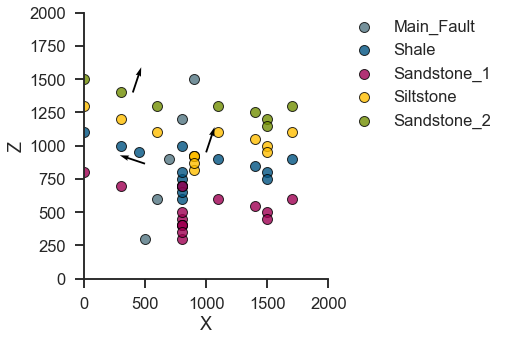

In [14]:
#Set up model:

#Grid:
xmin = 0
xmax = 2000.
xres = 50
ymin = 0
ymax = 2000.
yres = 50
zmin = 0
zmax = 2000.
zres = 50

geo_model = gp.create_model('tutorial')                                                                          #create model object
gp.init_data(geo_model, [xmin,xmax, ymin,ymax, zmin,zmax], [xres,yres,zres], path_o = orfile, path_i = intfile)  #import data
gp.map_series_to_surfaces(geo_model, 
                          {"Fault_Series":'Main_Fault',  
                           "Strat_Series": ('Sandstone_2','Siltstone','Shale', 'Sandstone_1', 'basement')})      #set series & formation order
geo_model.set_is_fault(['Fault_Series'])                                                                         #set presence of fault
gp.plot.plot_data(geo_model, direction = 'y')

#Run model:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model)

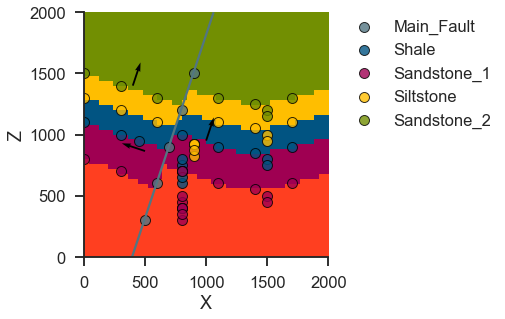

In [17]:
#Visualize model:
gp.plot.plot_section(geo_model, cell_number=25, direction='y', show_data=True)  #plot 2D cross-section
ver,sim = gp.get_surfaces(geo_model)                                            #get surface for 3D visualization
gp.plot.plot_3D(geo_model)                                                      #plot in 3D using vtk (remember to close window after) - surfaces not visible here